In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow.keras import layers, preprocessing

In [6]:
# Veri seti yolu
path = 'fire/'
input_shape = (256, 256, 3)
batch_size = 64

In [7]:
# Dataset'in yüklenmesi
def load_datasets(path):
    print("Train dataset")
    train_ds = preprocessing.image_dataset_from_directory(path + 'Train', batch_size=batch_size, label_mode='binary')
    
    print("Test dataset")
    test_ds = preprocessing.image_dataset_from_directory(path + 'Test', batch_size=batch_size, label_mode='binary')
    
    print("Validation dataset")
    val_ds = preprocessing.image_dataset_from_directory(path + 'Vali', batch_size=batch_size, label_mode='binary')
    
    return train_ds, test_ds, val_ds

# Veri setinin yüklenmesi
train_ds, test_ds, val_ds = load_datasets(path)

Train dataset
Found 6003 files belonging to 2 classes.
Test dataset
Found 2000 files belonging to 2 classes.
Validation dataset
Found 2000 files belonging to 2 classes.


In [8]:
# Veri seti hakkında bilgi
def dataset_info(dataset):
    # İlk batch üzerinde dataset özelliklerinin gösterilmesi
    for images, labels in dataset.take(1):
        print("Image batch shape: ", images.shape)
        print("Labels batch shape: ", labels.shape)
        print("Number of classes: ", len(np.unique(labels)))

# Veri setinin genel özelliklerinin yazdırılması
print("Train dataset info:")
dataset_info(train_ds)
print("Test dataset info:")
dataset_info(test_ds)
print("Validation dataset info:")
dataset_info(val_ds)

Train dataset info:
Image batch shape:  (64, 256, 256, 3)
Labels batch shape:  (64, 1)
Number of classes:  2
Test dataset info:
Image batch shape:  (64, 256, 256, 3)
Labels batch shape:  (64, 1)
Number of classes:  2
Validation dataset info:
Image batch shape:  (64, 256, 256, 3)
Labels batch shape:  (64, 1)
Number of classes:  2


In [9]:
# Verilerin görselleştirilmesi
def display_sample_images(class_names, path):
    num_samples = 4
    for x in class_names:
        plt.figure(figsize=(20, 20))
        filenames = os.listdir(path + 'Train/' + x)
        
        for i in range(num_samples):
            ax = plt.subplot(1, num_samples, i + 1)
            img = Image.open(path + 'Train/' + x + '/' + filenames[i])
            plt.imshow(img)
            plt.title(x)
            plt.axis("off")

Train class names:  ['Fire', 'Non-Fire']


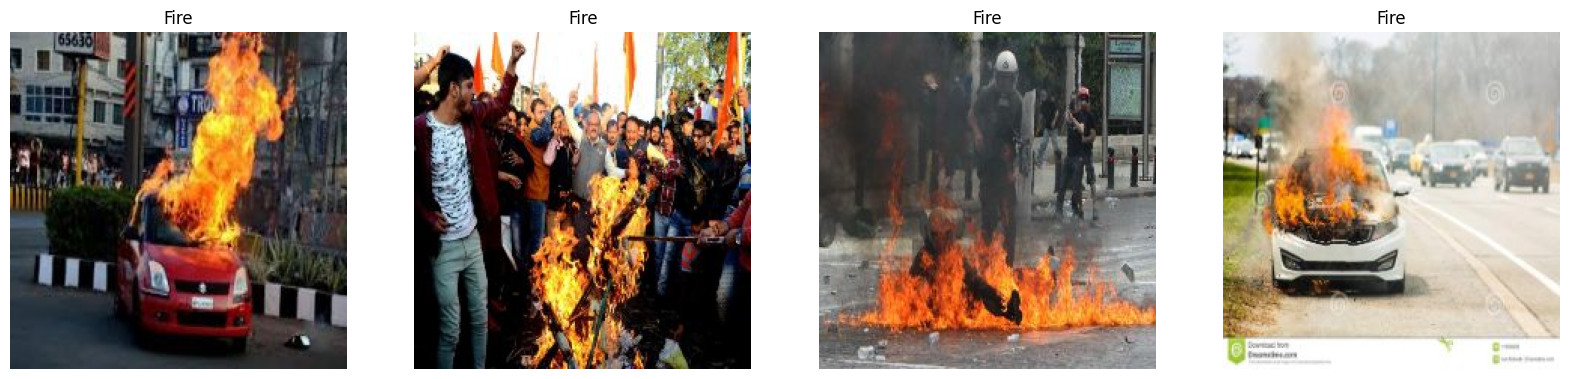

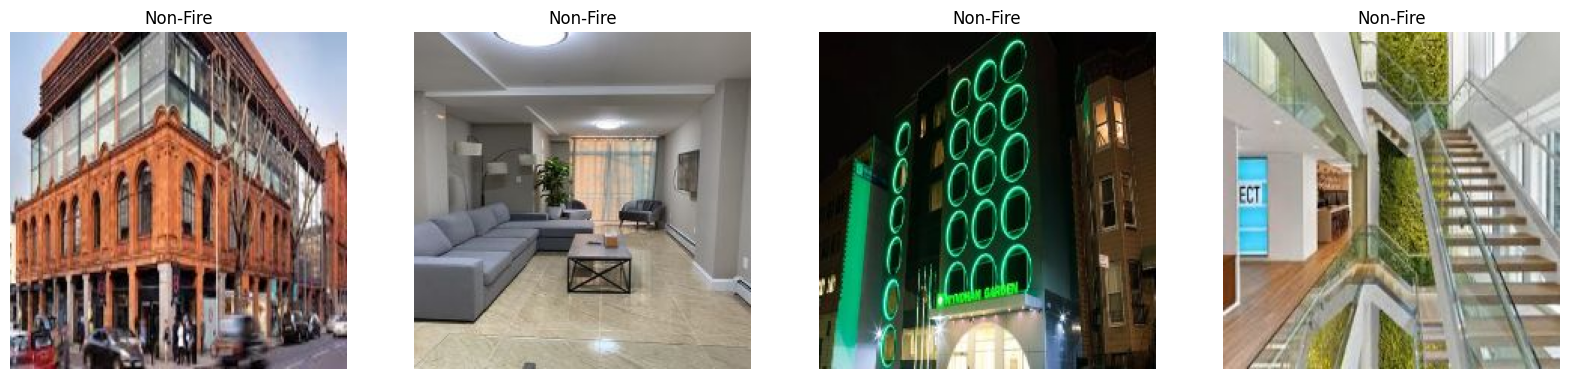

In [10]:
# Sınıf adlarının görüntülenmesi
class_names = train_ds.class_names
print("Train class names: ", class_names)
display_sample_images(class_names, path)

In [11]:
# Normalizasyon işlemi
def normalize_data(train_ds, test_ds, val_ds):
    normalization_layer = layers.Rescaling(1./255)
    
    train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
    test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))
    val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))
    
    return train_ds, test_ds, val_ds

train_ds, test_ds, val_ds = normalize_data(train_ds, test_ds, val_ds)

# Normalizasyon sonrası veri seti özelliklerini kontrol etme
print("After normalization:")
dataset_info(train_ds)
dataset_info(test_ds)
dataset_info(val_ds)

print("Dataset exploration and preprocessing completed.")

After normalization:
Image batch shape:  (64, 256, 256, 3)
Labels batch shape:  (64, 1)
Number of classes:  2
Image batch shape:  (64, 256, 256, 3)
Labels batch shape:  (64, 1)
Number of classes:  2
Image batch shape:  (64, 256, 256, 3)
Labels batch shape:  (64, 1)
Number of classes:  2
Dataset exploration and preprocessing completed.
